In [1]:
import pickle
import json
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load all nb json files in processed folder
nb_json_folder = 'data/data_Kaggle/processed_98_all/'
notebooks = []
for file in os.listdir(nb_json_folder):
    if file.endswith(".json"): 
        with open(os.path.join(nb_json_folder, file), 'r') as f:
            nb_json = json.load(f)
            notebooks.append(nb_json)

# load nb similarities
nb_sim = 'data/data_Kaggle/stats_98_all/DistilBERT_nb_similarities.pkl'  
with open(nb_sim, 'rb') as f:
    nb_sim_matrix = pickle.load(f)

nb_sim_matrix = np.array(nb_sim_matrix)
print(nb_sim_matrix.shape)

# load cell similarities
cell_sim = 'data/data_Kaggle/stats_98_all/DistilBERT_nb_similarities.pkl'
with open(cell_sim, 'rb') as f:
    
    cell_sim_matrix = pickle.load(f)

# cell_sim_matrix = np.array(cell_sim_matrix)
# print(cell_sim_matrix.shape)



# remove notebook 89, as it is outlier
notebooks.pop(89)
nb_sim_matrix = np.delete(nb_sim_matrix, 89, axis=0)
nb_sim_matrix = np.delete(nb_sim_matrix, 89, axis=1)
print(nb_sim_matrix.shape)

(98, 98)
(97, 97)


In [23]:
for i in range(len(notebooks[0]['all_cells'])):
    mc_idx = notebooks[0]['all_cells'][i]['mc_idx']
    source = notebooks[0]['all_cells'][i]['source']
    cell_type = notebooks[0]['all_cells'][i]['cell_type']
    classification = notebooks[0]['all_cells'][i]['classification']
    
    keywords_dict = notebooks[0]['all_cells'][i]['detailed_scores']
    # if empty list
    if not keywords_dict:
        keywords_dict = {'None': []}
    if type(keywords_dict) == list:
        keywords_dict = keywords_dict[0]
    
    # get all items of each key and make into a list
    keywords = []
    for key in keywords_dict:
        keywords.extend(keywords_dict[key])
    
    print(keywords)
    



[]
[]
['import ', 'matplotlib', 'matplotlib', 'pyplot']
['read_csv', 'pd.read_']
['.head(', 'head', '.head']
['.drop']
['.head(', 'head', '.head']
[]
[]
['.isnull', '.sum']
['.isnull', '.sum']
[]
[]
[]
[]
['sns.', 'size', 'sns.']
['.concat(', '.drop', '.concat', '.get_dummies']
[]
['.drop']
[]
[]
['.boxplot(', 'sns.', 'size', '.boxplot(', 'sns.']
['sns.', 'size', 'sns.']
[]
[]
['sns.', 'size', 'sns.', '.kde']
[]
[]
['.describe(', 'describe', '.describe']
[]
['.describe(', 'describe', '.describe', '.fillna(', '.fillna']
[]
['distplot', 'sns.', 'size', 'sns.']
[]
['.show', 'distplot', 'sns.', 'size', 'sns.']
['.describe(', 'describe', '.describe', '.fillna(', '.fillna']
[]
[]
[]
['sns.', 'size', 'sns.']
['.fillna(', '.fillna']
[]
['.concat(', '.drop', '.concat', '.get_dummies']
[]
[]
['.show', 'sns.', 'size', 'sns.']
['.apply(', '.apply']
[]
['.drop']
['sns.', 'size', 'sns.']
[]
[]
[]
[]
['.isnull']
[]
['sns.', 'size', 'sns.']
[]
['.map(', '.astype(', '.map']
[]
[]
[]
[]
['.split']
['.dr

c:\Anaconda3\envs\ml_course\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


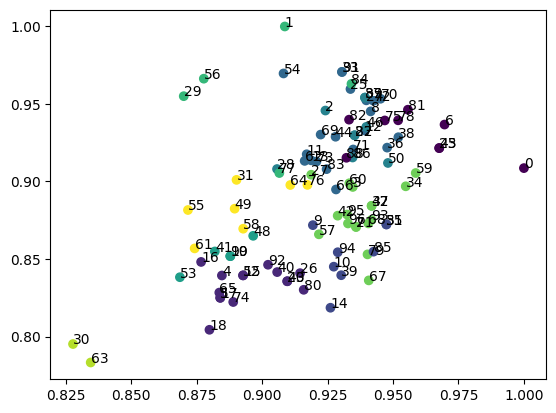

[0 6 4 7 1 1 0 7 3 2 2 3 3 3 2 1 1 1 1 5 1 7 4 0 3 3 1 7 4 6 8 9 7 3 7 2 3
 4 3 2 1 5 7 1 3 0 4 7 5 9 4 2 1 5 3 9 6 7 9 7 7 9 3 8 9 1 3 7 7 3 3 3 3 3
 1 0 9 6 0 7 1 0 0 3 6 2 4 4 0 4 5 3 1 7 2 7 7]
Cluster 0: (count 9) 	 [0, 6, 23, 45, 75, 78, 81, 82, 88]
Cluster 1: (count 15) 	 [4, 5, 15, 16, 17, 18, 20, 26, 40, 43, 52, 65, 74, 80, 92]
Cluster 2: (count 8) 	 [9, 10, 14, 35, 39, 51, 85, 94]
Cluster 3: (count 20) 	 [8, 11, 12, 13, 24, 25, 33, 36, 38, 44, 54, 62, 66, 69, 70, 71, 72, 73, 83, 91]
Cluster 4: (count 9) 	 [2, 22, 28, 37, 46, 50, 86, 87, 89]
Cluster 5: (count 5) 	 [19, 41, 48, 53, 90]
Cluster 6: (count 5) 	 [1, 29, 56, 77, 84]
Cluster 7: (count 17) 	 [3, 7, 21, 27, 32, 34, 42, 47, 57, 59, 60, 67, 68, 79, 93, 95, 96]
Cluster 8: (count 2) 	 [30, 63]
Cluster 9: (count 7) 	 [31, 49, 55, 58, 61, 64, 76]


In [ ]:
# perform k-means clustering on the similarity matrix
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42).fit(nb_sim_matrix)

# plot the clusters, plot the nb_idx next to the data point
fig, ax = plt.subplots()
ax.scatter(nb_sim_matrix[:,0], nb_sim_matrix[:,1], c=kmeans.labels_)
for i, txt in enumerate(range(len(notebooks))):
    ax.annotate(txt, (nb_sim_matrix[i,0], nb_sim_matrix[i,1]))
plt.show()

# save the cluster labels
cluster_labels = kmeans.labels_
print(cluster_labels)

# print per cluster, the count of how much, and which notebooks are in it
for i in range(10):
    print(f'Cluster {i}: (count {np.sum(cluster_labels == i)}) \t {[idx for idx, label in enumerate(cluster_labels) if label == i]}')	





In [26]:
import networkx as nx

# create nb sim graph
G_nb = nx.Graph()
edges = []

for i in range(nb_sim_matrix.shape[0]):
    for j in range(nb_sim_matrix.shape[1]):
        nbi = notebooks[i]['nb_name']
        nbj = notebooks[j]['nb_name']
        if nb_sim_matrix[i, j] > 0.9 and nbi != nbj:
            edges.append((nbi, nbj, nb_sim_matrix[i, j]))

G_nb.add_weighted_edges_from(edges)

print(G_nb.number_of_nodes())
print(G_nb.number_of_edges())

# # create cell sim graph 
# G_cell = nx.Graph()
# edges = []

# # and create a graph for each classification
# edges_per_class = {
#     "Environment": [],
#     "Data_Extraction": [],
#     "Exploratory_Data_Analysis": [],
#     "Data_Transform": [],
#     "Model_Train": [],
#     "Model_Evaluation": [],
#     "Model_Interpretation": [],
#     "Hyperparameter_Tuning": [],
#     "Visualization": [],
#     "Debug": [],
#     "Data_Export": [],
#     "Other": [],
# }

# for i in range(len(cell_sim_matrix)):
#     for j in range(len(cell_sim_matrix[i])):
#         nbi = notebooks[i]['nb_name']
#         nbj = notebooks[j]['nb_name']
#         #cell_sim_matrix[i, j] = np.array(cell_sim_matrix[i][j])
#         for c1 in range(len(cell_sim_matrix[i][j])):
#             for c2 in range(len(cell_sim_matrix[i][j][c1])):
#                 class_c1 = notebooks[i]['all_cells'][c1]['classification']
#                 class_c2 = notebooks[j]['all_cells'][c2]['classification']

#                 if class_c1 == 'Markdown' or class_c2 == 'Markdown':
#                     continue
       
#                 sim = cell_sim_matrix[i][j][c1][c2]
#                 if sim > 0.9 and (i != j and c1 != c2):
#                     edge_data = {
#                         'weight': sim,  # existing weight
#                         'nb_idx': (i, j),                         # adding (nb_idx, nb_idx)
#                         'mc_idx': (c1, c2)                        # adding (mc_idx, mc_idx)
#                     }
#                     edges.append((str(i) + '_' + str(c1), str(j) + '_' + str(c2), edge_data))

#                     # add to class graph
#                     if (class_c1 == 'Other' or class_c2 == 'Other') or class_c1 == class_c2:
#                         edges_per_class[class_c1].append((str(i) + '_' + str(c1), str(j) + '_' + str(c2), edge_data))
#                         edges_per_class[class_c2].append((str(i) + '_' + str(c1), str(j) + '_' + str(c2), edge_data))



#                     # if class_c1 == 'Other' or class_c2 == 'Other':
#                     #     for key in edges_per_class.keys():
#                     #         edges_per_class[key].append((str(i) + '_' + str(c1), str(j) + '_' + str(c2), edge_data))
                    

# G_cell.add_edges_from(edges)

# print(G_cell.number_of_nodes())
# print(G_cell.number_of_edges())


# # make graph per classificaiton
# G_env = nx.Graph()
# G_de = nx.Graph()
# G_eda = nx.Graph()
# G_dt = nx.Graph()
# G_mt = nx.Graph()
# G_me = nx.Graph()
# G_mi = nx.Graph()
# G_ht = nx.Graph()
# G_vis = nx.Graph()
# G_dbg = nx.Graph()
# G_de = nx.Graph()
# G_o = nx.Graph()


# G_env.add_edges_from(edges_per_class['Environment'])
# G_de.add_edges_from(edges_per_class['Data_Extraction'])
# G_eda.add_edges_from(edges_per_class['Exploratory_Data_Analysis'])
# G_dt.add_edges_from(edges_per_class['Data_Transform'])
# G_mt.add_edges_from(edges_per_class['Model_Train'])
# G_me.add_edges_from(edges_per_class['Model_Evaluation'])
# G_mi.add_edges_from(edges_per_class['Model_Interpretation'])
# G_ht.add_edges_from(edges_per_class['Hyperparameter_Tuning'])
# G_vis.add_edges_from(edges_per_class['Visualization'])
# G_dbg.add_edges_from(edges_per_class['Debug'])
# G_de.add_edges_from(edges_per_class['Data_Export'])
# G_o.add_edges_from(edges_per_class['Other'])






97
2294


In [45]:
# import numpy as np
# import networkx as nx
# from multiprocessing import Pool

# # Assume cell_sim_matrix is a 4D NumPy array
# def process_chunk(nb1i_chunk):
#     edges = []
#     for nb1i in nb1i_chunk:
#         for nb2i in range(nb1i, cell_sim_matrix.shape[1]):  # Avoid redundant checks
#             for c1i in range(cell_sim_matrix.shape[2]):
#                 for c2i in range(cell_sim_matrix.shape[3]):
#                     similarity = cell_sim_matrix[nb1i, nb2i, c1i, c2i]
#                     if similarity > threshold:
#                         node1 = f"{nb1i}_{c1i}"
#                         node2 = f"{nb2i}_{c2i}"
#                         edges.append((node1, node2, similarity))
#         print(f"Processed notebook {nb1i} chunk. Now total {len(edges)} edges.")
#     return edges

# # Parallel processing setup
# threshold = 0.75
# num_processes = 4
# nb1i_chunks = np.array_split(np.arange(cell_sim_matrix.shape[0]), num_processes)

# with Pool(processes=num_processes) as pool:
#     results = pool.map(process_chunk, nb1i_chunks)

# # Flatten the results and construct the graph
# edges = [edge for result in results for edge in result]
# G = nx.Graph()
# G.add_weighted_edges_from(edges)

# # Calculate edge ratio
# total_possible_edges = np.prod(cell_sim_matrix.shape)
# count_edges = len(edges)
# count_non_edges = total_possible_edges - count_edges
# print('Edge ratio: ', count_edges / (count_edges + count_non_edges))

# 567m = 9,5 hours and no result
# 2669m = 44,5 hours and no result

In [3]:
# nb_keys = notebooks[0].keys()
# [print(key) for key in nb_keys]

In [4]:
# nb_sim_matrix

In [5]:
# example
# nb1, c1 = 2,3
# nb2, c2 = 6,3
# print(cell_sim_matrix[nb1][nb2][c1][c2])

# #print the source of both cells
# print('source c1: ',notebooks[nb1]['all_cells'][c1]['source'])
# print('source c2: ', notebooks[nb2]['all_cells'][c2]['source'])



In [6]:
# # more efficient way to construct Graph
# import networkx as nx
# from multiprocessing import Pool
# import matplotlib.pyplot as plt

# # Function to process a chunk of the similarity matrix
# def process_chunk(chunk):
#     edges = []
#     for (nb1i, nb1), (nb2i, nb2), (c1i, c1), (c2i, c2), similarity in chunk:
#         if similarity > threshold:  # Use an appropriate threshold
#             node1 = f"{nb1}_{c1}"
#             node2 = f"{nb2}_{c2}"
#             edges.append((node1, node2, similarity))
#     return edges

# # Flatten the cell_sim_matrix to a list of tuples (nb1i, nb2i, c1i, c2i, similarity)
# flattened_matrix = [
#     (nb1i, nb1, nb2i, nb2, c1i, c1, c2i, c2, similarity)
#     for nb1i, nb1 in enumerate(cell_sim_matrix)
#     for nb2i, nb2 in enumerate(cell_sim_matrix[nb1i])
#     for c1i, c1 in enumerate(cell_sim_matrix[nb1i][nb2i])
#     for c2i, c2 in enumerate(cell_sim_matrix[nb1i][nb2i][c1i])
#     for similarity in [cell_sim_matrix[nb1i][nb2i][c1i][c2i]]
# ]

# # Set the similarity threshold
# threshold = 0.75

# # Use multiprocessing to process the matrix in parallel
# chunk_size = len(flattened_matrix) // 4  # Adjust the number of chunks based on your system's capabilities
# chunks = [flattened_matrix[i:i + chunk_size] for i in range(0, len(flattened_matrix), chunk_size)]

# with Pool() as pool:
#     results = pool.map(process_chunk, chunks)

# # Flatten the results and construct the graph
# edges = [edge for result in results for edge in result]
# G = nx.Graph()
# G.add_weighted_edges_from(edges)

# # Calculate edge ratio
# count_edges = len(edges)
# count_non_edges = len(flattened_matrix) - count_edges
# print('Edge ratio: ', count_edges / (count_edges + count_non_edges))

In [31]:
# # construct Graph
# import networkx as nx
# import matplotlib.pyplot as plt

# # Initialize a graph with similarity threshold
# G = nx.Graph()
# threshold = 0.75

# count_edges = 0
# count_non_edges = 0
# # Adding nodes and edges based on cell_sim_matrix
# for nb1i, nb1 in enumerate(cell_sim_matrix):
#     for nb2i, nb2 in enumerate(cell_sim_matrix[nb1i]):
#         for c1i, c1 in enumerate(cell_sim_matrix[nb1i][nb2i]):
#             for c2i, c2 in enumerate(cell_sim_matrix[nb1i][nb2i][c1i]):
#                 similarity = cell_sim_matrix[nb1i][nb2i][c1i][c2i]
#                 if similarity > threshold:  # Use an appropriate threshold
#                     node1 = f"{nb1}_{c1}"
#                     node2 = f"{nb2}_{c2}"
#                     G.add_edge(node1, node2, weight=similarity)
#                     count_edges += 1
#                 else:
#                     count_non_edges += 1
#     print(f'Processed notebook {nb1i}')
    
# print('Edge ratio: ', count_edges/(count_edges+count_non_edges))

In [ ]:
# #TODO: GRAPH per classification? duplicate nodes, all with possible classification > 0.5
# # import matplotlib.pyplot as plt


# possible_classifications = ["Environment", "Data_Extraction", "Exploratory_Data_Analysis","Data_Transform", "Model_Train","Model_Evaluation", "Model_Interpretation", "Hyperparameter_Tuning", "Visualization", "Debug", "Data_Export", "Other"]
# graphs = {}
# for classification in possible_classifications:
#     # Initialize a graph with similarity threshold
#     G = nx.Graph()
#     threshold = 0.75

#     count_edges = 0
#     count_non_edges = 0
#     # Adding nodes and edges based on cell_sim_matrix
#     for nb1i, nb1 in enumerate(cell_sim_matrix):
#         for nb2i, nb2 in enumerate(cell_sim_matrix[nb1i]):
#             for c1i, c1 in enumerate(cell_sim_matrix[nb1i][nb2i]):
#                 for c2i, c2 in enumerate(cell_sim_matrix[nb1i][nb2i][c1i]):
#                     similarity = cell_sim_matrix[nb1i][nb2i][c1i][c2i]
#                     if similarity > threshold:  # Use an appropriate threshold
#                         if notebooks[nb1]['classification'] == classification and notebooks[nb2]['classification'] == classification:
#                             node1 = f"{nb1}_{c1}"
#                             node2 = f"{nb2}_{c2}"
#                             G.add_edge(node1, node2, weight=similarity)
#                             count_edges += 1
#                     else:
#                         count_non_edges += 1
#         print(f'Processed notebook {nb1i}')

#     graphs[classification] = G
    
#     print('Edge ratio: ', count_edges/(count_edges+count_non_edges))
#     plt.figure(figsize=(10, 10))
#     nx.draw(G, with_labels=True, font_size=8, node_size=1000, font_color='black')
#     plt.title(f'Graph of {classification} notebooks')
#     plt.show()

c:\Anaconda3\envs\ml_course\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


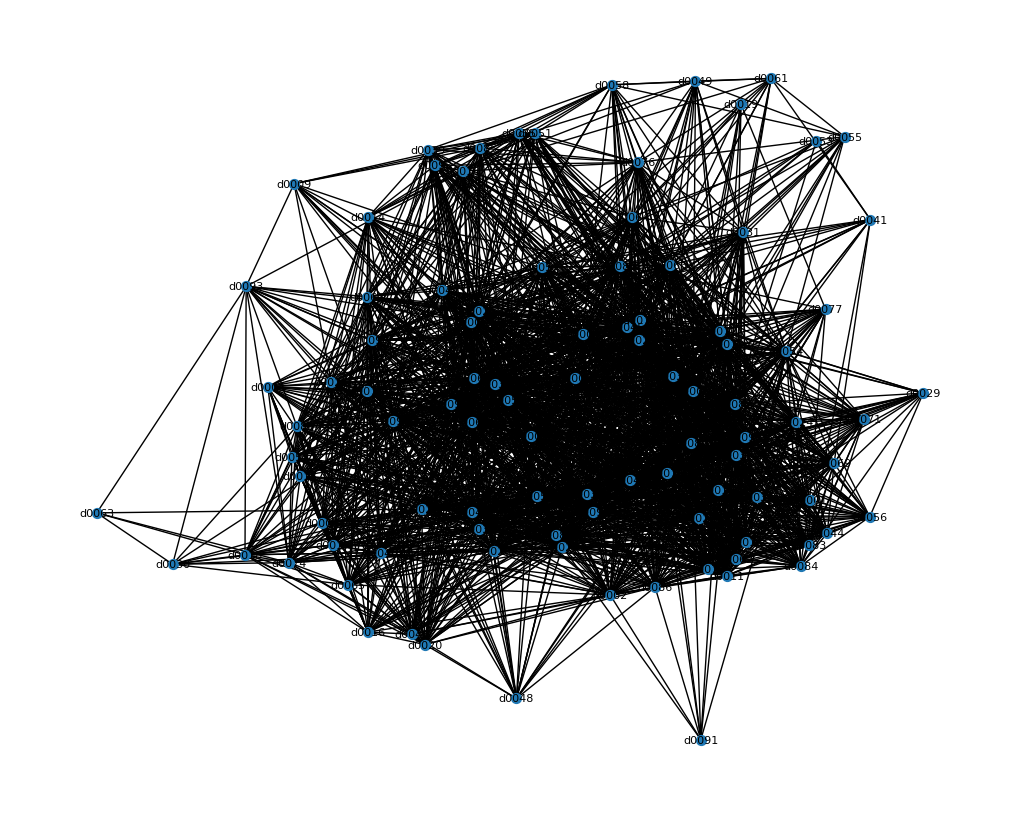

c:\Anaconda3\envs\ml_course\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


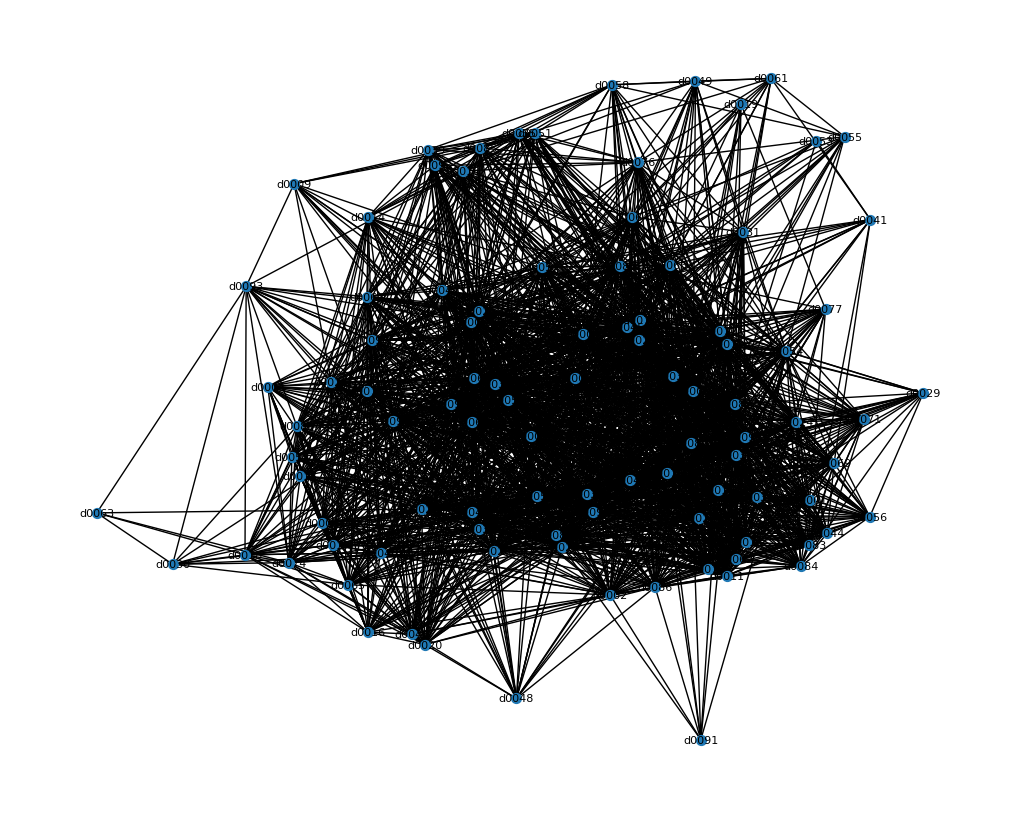

Number of nodes  97 	 before  97
Number of edges  2294 	 before  2294


In [27]:
import networkx as nx
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

G_cell = G_nb
# Assuming G_cell is already created and populated as shown in your previous code
# Calculate the shortest path distance matrix
length = dict(nx.all_pairs_shortest_path_length(G_cell))

# Convert to a distance matrix suitable for MDS
nodes = list(G_cell.nodes())
n = len(nodes)
dist_matrix = np.zeros((n, n))

for i, u in enumerate(nodes):
    for j, v in enumerate(nodes):
        dist_matrix[i, j] = length[u][v] if v in length[u] else np.inf

# Handle infinity by replacing it with a large number (maximum finite distance + 1)
finite_distances = dist_matrix[np.isfinite(dist_matrix)]
max_finite_distance = finite_distances.max()
dist_matrix[np.isinf(dist_matrix)] = max_finite_distance + 1

# Apply Multidimensional Scaling (MDS)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
pos = mds.fit_transform(dist_matrix)

# Create a position dictionary for visualization
pos_dict = {nodes[i]: pos[i] for i in range(n)}

# Plot the graph with the MDS positions
plt.figure(figsize=(10, 8))
nx.draw(G_cell, pos=pos_dict, with_labels=True, node_size=50, font_size=8)
plt.show()

# Alternatively, if you want to remove nodes with no connections or low connections:
degree_threshold = 2  # or any threshold you prefer
filtered_nodes = [node for node, degree in G_cell.degree() if degree > degree_threshold]

# remove node with no connections
G_filtered = G_cell.subgraph(filtered_nodes)

# Recompute MDS for the filtered graph
filtered_dist_matrix = dist_matrix[np.ix_([nodes.index(n) for n in filtered_nodes], 
                                          [nodes.index(n) for n in filtered_nodes])]
filtered_pos = mds.fit_transform(filtered_dist_matrix)



# Create a position dictionary for the filtered graph
filtered_pos_dict = {filtered_nodes[i]: filtered_pos[i] for i in range(len(filtered_nodes))}

# Plot the filtered graph
plt.figure(figsize=(10, 8))
nx.draw(G_filtered, pos=filtered_pos_dict, with_labels=True, node_size=50, font_size=8)
plt.show()

# print number nodes in filtered graph and number edges in filtered graph
print('Number of nodes ', G_filtered.number_of_nodes(), '\t before ', G_cell.number_of_nodes())
print('Number of edges ', G_filtered.number_of_edges(), '\t before ', G_cell.number_of_edges())

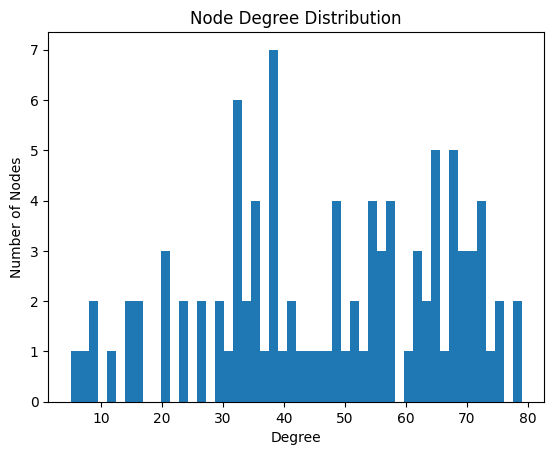

Top 5 nodes with highest degree: [('d0059', 79), ('d0075', 79), ('d0034', 76), ('d0006', 75), ('d0050', 74)]


In [28]:
G = G_nb
# Node degree
degree_dict = dict(G.degree())
plt.hist(degree_dict.values(), bins=50)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Node Degree Distribution')
plt.show()

# Top 5 nodes with highest degree
top_5_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]
print('Top 5 nodes with highest degree:', top_5_nodes)

In [78]:
# print the source and classification of the top 5 nodes
for node, degree in top_5_nodes:
    nb_idx, mc_idx = map(int, node.split('_'))
    print(f"Nb {nb_idx}, cell {mc_idx} (node {node}) with degree {degree}:")
    print('Source:', notebooks[nb_idx]['all_cells'][mc_idx]['source'])
    print('Classification:', notebooks[nb_idx]['all_cells'][mc_idx]['classification'])
    # print the 5 most similar cells to the current node
    print('__________5 most similar cells:__________')
    top_5_similar = sorted(G[node].items(), key=lambda x: x[1]['weight'], reverse=True)[:5]
    for similar_node, edge_data in top_5_similar:
        sim_nb_idx, sim_mc_idx = map(int, similar_node.split('_'))
        print(f"\tNb {sim_nb_idx}, cell {sim_mc_idx} (node {similar_node}) with similarity {edge_data['weight']}")

        print('Source:', notebooks[sim_nb_idx]['all_cells'][sim_mc_idx]['source'])
        print('Classification:', notebooks[sim_nb_idx]['all_cells'][sim_mc_idx]['classification'])
        print('___________________________________________')
    
    
    print('\n')
    print('-------------------------------------------------------------------------')
    print('\n')

Nb 12, cell 9 (node 12_9) with degree 25:
Source: sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.show()
Classification: Environment
__________5 most similar cells:__________
	Nb 18, cell 42 (node 18_42) with similarity 0.9695392847061157
Source: sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()
Classification: Environment
___________________________________________
	Nb 18, cell 24 (node 18_24) with similarity 0.9596562385559082
Source: sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()
Classification: Environment
___________________________________________
	Nb 1, cell 15 (node 1_15) with similarity 0.9415007829666138
Source: dfplt = df.copy(deep=True)
dfplt["Survived"] = dfplt["Survived"].astype(str)
fig = px.histogram(dfplt, x="Cabin",color="Survived", height=300,
                   color_discrete_sequence=cm)
fig.show()
Classification: Environment
___________________________________________
	Nb 8, cell 31 (node 8_31) with similarity 

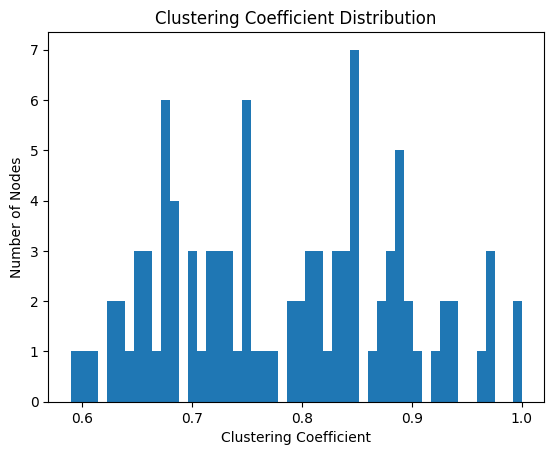

Average clustering coefficient: 0.7837274652683911


In [29]:
# TASK: Determine the overall clustering tendency in the network, 
# Clustering coefficient
clustering_coeff = nx.clustering(G)
plt.hist(clustering_coeff.values(), bins=50)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of Nodes')
plt.title('Clustering Coefficient Distribution')
plt.show()

# Average clustering coefficient
avg_clustering = sum(clustering_coeff.values()) / len(clustering_coeff)
print('Average clustering coefficient:', avg_clustering)



Top 5 nodes by betweenness centrality: [('d0075', 0.027737126068019338), ('d0068', 0.023954927590125272), ('d0027', 0.02138144301424793), ('d0059', 0.018317387301911073), ('d0060', 0.01678250137010557)]
Top 5 nodes by closeness centrality: [('d0059', 0.8495575221238938), ('d0075', 0.8495575221238938), ('d0034', 0.8275862068965517), ('d0006', 0.8205128205128205), ('d0050', 0.8135593220338984)]
Top 5 nodes by eigenvector centrality: [('d0059', 0.1494576738797757), ('d0075', 0.14647942117518797), ('d0006', 0.14548971694936974), ('d0034', 0.1453140965336778), ('d0050', 0.14426640956674766)]
Bottom 5 nodes by betweenness centrality: [('d0029', 0.0), ('d0063', 0.0), ('d0019', 8.43454790823212e-06), ('d0091', 8.43454790823212e-06), ('d0053', 5.869453044375645e-05)]
Bottom 5 nodes by closeness centrality: [('d0063', 0.43243243243243246), ('d0030', 0.47761194029850745), ('d0061', 0.5026178010471204), ('d0055', 0.5052631578947369), ('d0053', 0.5079365079365079)]
Bottom 5 nodes by eigenvector cen

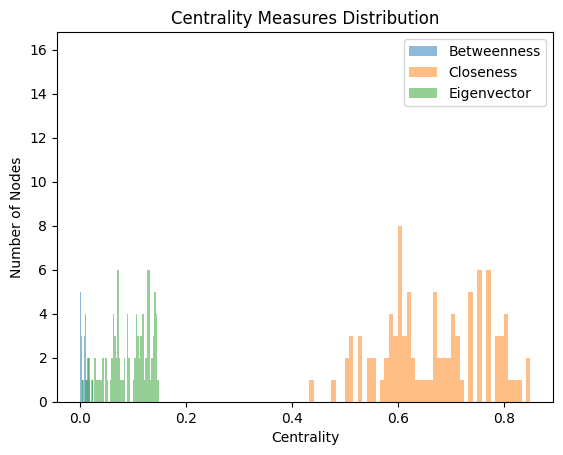

In [30]:

# TASK: Detect clusters of cells with similar functionality
# Centrality measures
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Top 5 nodes by betweenness centrality
top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print('Top 5 nodes by betweenness centrality:', top_5_betweenness) # SHOULD BE MOST IMPOrTANT NODES IN NETWORK? 

# Top 5 nodes by closeness centrality
top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print('Top 5 nodes by closeness centrality:', top_5_closeness)

# Top 5 nodes by eigenvector centrality
top_5_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print('Top 5 nodes by eigenvector centrality:', top_5_eigenvector)

# Bottom 5 nodes by betweenness centrality
bottom_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1])[:5]
print('Bottom 5 nodes by betweenness centrality:', bottom_5_betweenness)

# Bottom 5 nodes by closeness centrality
bottom_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1])[:5]
print('Bottom 5 nodes by closeness centrality:', bottom_5_closeness)

# Bottom 5 nodes by eigenvector centrality
bottom_5_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1])[:5]
print('Bottom 5 nodes by eigenvector centrality:', bottom_5_eigenvector)

# Visualization of centrality distributions
plt.hist(betweenness_centrality.values(), bins=50, alpha=0.5, label='Betweenness')
plt.hist(closeness_centrality.values(), bins=50, alpha=0.5, label='Closeness')
plt.hist(eigenvector_centrality.values(), bins=50, alpha=0.5, label='Eigenvector')
plt.xlabel('Centrality')
plt.ylabel('Number of Nodes')
plt.title('Centrality Measures Distribution')
plt.legend()
plt.show()


Number of connected components: 1


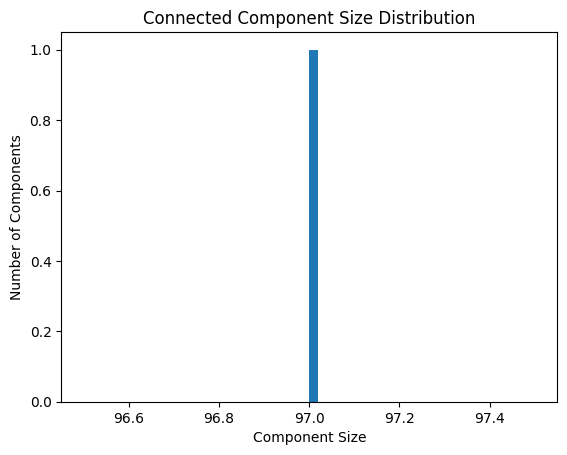

Sizes of all connected components: [97]


In [31]:
# TASK: identify isolated groups of similar cells, which could represent distinct sections or independent pieces of code
# Connected components
connected_components = list(nx.connected_components(G))
# Number of connected components
num_components = len(connected_components)
print('Number of connected components:', num_components)

component_sizes = [len(component) for component in connected_components]
plt.hist(component_sizes, bins=50)
plt.xlabel('Component Size')
plt.ylabel('Number of Components')
plt.title('Connected Component Size Distribution')
plt.show()

# the sizes of all connected components
print('Sizes of all connected components:', component_sizes)


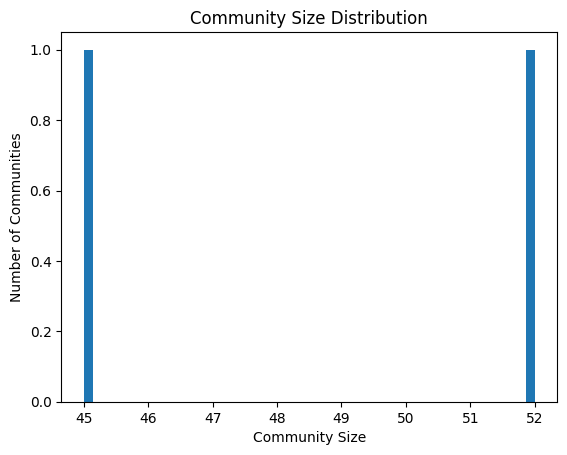

Number of communities: 2
Community 1 size: 52
Community 2 size: 45
Community 1 members: frozenset({'d0029', 'd0076', 'd0006', 'd0019', 'd0075', 'd0070', 'd0091', 'd0081', 'd0002', 'd0072', 'd0025', 'd0056', 'd0062', 'd0084', 'd0033', 'd0051', 'd0083', 'd0037', 'd0000', 'd0011', 'd0066', 'd0024', 'd0078', 'd0008', 'd0071', 'd0055', 'd0001', 'd0013', 'd0023', 'd0069', 'd0041', 'd0046', 'd0035', 'd0012', 'd0054', 'd0049', 'd0038', 'd0077', 'd0058', 'd0088', 'd0044', 'd0082', 'd0092', 'd0053', 'd0045', 'd0064', 'd0086', 'd0090', 'd0036', 'd0073', 'd0031', 'd0061'})
Community 2 members: frozenset({'d0027', 'd0022', 'd0039', 'd0079', 'd0015', 'd0007', 'd0048', 'd0030', 'd0014', 'd0096', 'd0065', 'd0095', 'd0059', 'd0005', 'd0026', 'd0057', 'd0020', 'd0018', 'd0042', 'd0063', 'd0010', 'd0032', 'd0050', 'd0047', 'd0097', 'd0052', 'd0017', 'd0085', 'd0034', 'd0068', 'd0094', 'd0087', 'd0080', 'd0009', 'd0004', 'd0043', 'd0016', 'd0003', 'd0040', 'd0060', 'd0093', 'd0067', 'd0074', 'd0028', 'd00

In [32]:
# TASK: Discover groups of cells that are very very similar
# Community detection
from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(G)
community_sizes = [len(community) for community in communities]
plt.hist(community_sizes, bins=50)
plt.xlabel('Community Size')
plt.ylabel('Number of Communities')
plt.title('Community Size Distribution')
plt.show()

# Number of communities
num_communities = len(communities)
print('Number of communities:', num_communities)

# Example: Top 5 communities by size
top_5_communities = sorted(communities, key=len, reverse=True)[:5]
for i, community in enumerate(top_5_communities):
    print(f'Community {i+1} size: {len(community)}')

# print members of each comunnity
for i, community in enumerate(communities):
    print(f'Community {i+1} members:', community)

In [ ]:
# example
nb1, c1 = 2,3
nb2, c2 = 6,3
print(cell_sim_matrix[nb1][nb2][c1][c2])

#print the source of both cells
print('source c1: ',notebooks[nb1]['all_cells'][c1]['source'])
print('source c2: ', notebooks[nb2]['all_cells'][c2]['source'])



0.894577145576477
source c1:  import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import math 
import xgboost as xgb
np.random.seed(2019)
from scipy.stats import skew
from scipy import stats

import statsmodels
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
print("done")
source c2:  import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
